<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">2014 South Napa Earthquake</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Event Plot</div>
        </div>
    </div>
</div>

### **2017 CIG-LLNL Computational Seismology Workshop**


##### Authors:
* Artie Rogers
* Lion Krischer ([@krischer](https://github.com/krischer))
---

5) Make a map plot of event and stations that have instrument corrected waveforms

In [ ]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

In [1]:
import os
import glob
import obspy

files:  ['VEL/BK.BDM.e.sac', 'VEL/BK.BDM.n.sac', 'VEL/BK.BDM.r.sac', 'VEL/BK.BDM.t.sac', 'VEL/BK.BDM.z.sac', 'VEL/BK.BKS.e.sac', 'VEL/BK.BKS.n.sac', 'VEL/BK.BKS.r.sac', 'VEL/BK.BKS.t.sac', 'VEL/BK.BKS.z.sac', 'VEL/BK.BRIB.e.sac', 'VEL/BK.BRIB.n.sac', 'VEL/BK.BRIB.r.sac', 'VEL/BK.BRIB.t.sac', 'VEL/BK.BRIB.z.sac', 'VEL/BK.BRK.e.sac', 'VEL/BK.BRK.n.sac', 'VEL/BK.BRK.r.sac', 'VEL/BK.BRK.t.sac', 'VEL/BK.BRK.z.sac', 'VEL/BK.MCCM.e.sac', 'VEL/BK.MCCM.n.sac', 'VEL/BK.MCCM.r.sac', 'VEL/BK.MCCM.t.sac', 'VEL/BK.MCCM.z.sac', 'VEL/BK.VAK.e.sac', 'VEL/BK.VAK.n.sac', 'VEL/BK.VAK.r.sac', 'VEL/BK.VAK.t.sac', 'VEL/BK.VAK.z.sac', 'VEL/NC.CAG.e.sac', 'VEL/NC.CAG.n.sac', 'VEL/NC.CAG.r.sac', 'VEL/NC.CAG.t.sac', 'VEL/NC.CAG.z.sac', 'VEL/NC.CBR.e.sac', 'VEL/NC.CBR.n.sac', 'VEL/NC.CBR.r.sac', 'VEL/NC.CBR.t.sac', 'VEL/NC.CBR.z.sac', 'VEL/NC.CPI.e.sac', 'VEL/NC.CPI.n.sac', 'VEL/NC.CPI.r.sac', 'VEL/NC.CPI.t.sac', 'VEL/NC.CPI.z.sac', 'VEL/NC.CPM.e.sac', 'VEL/NC.CPM.n.sac', 'VEL/NC.CPM.r.sac', 'VEL/NC.CPM.t.sac', '

/Users/rodgers7/anaconda/lib/python3.5/site-packages/obspy/imaging/maps.py:402: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(water_fill_color)
/Users/rodgers7/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/rodgers7/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rodgers7/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


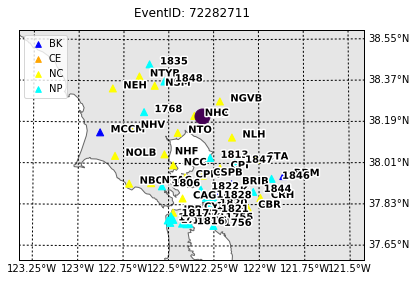

In [2]:
event_id = 72282711

event_dir = str(event_id)
os.chdir(event_dir)

# Read QuakeML file to get event metadata
cat = obspy.read_events(event_dir+'.QUAKEML')
event = cat[0]

files = glob.glob('VEL/??.*.?.sac')
print('files: ', files)
net_sta_list = []
for file in files:
    print('file: ', file)
    net = file.split('/')[1].split('.')[0]
    sta = file.split('/')[1].split('.')[1]
    print('net, sta: ', net, sta)
    net_sta_list.append(net+'.'+sta)
    net_sta_list = sorted(set(net_sta_list))
net_sta_list = sorted(set(net_sta_list))
print('net_sta_list: ', net_sta_list)

for net_sta in net_sta_list:
    try:
        inv += obspy.read_inventory('_station_xml/'+net_sta+'.xml')
    except:
        inv = obspy.read_inventory('_station_xml/'+net_sta+'.xml')
        
# Plot map of network
colors = {'BK': 'blue', 'NC': 'yellow', 'NP': 'cyan', 'CE': 'orange'}
fig = inv.plot(method="basemap", projection='local', resolution='h', show=False, marker='^', color_per_network=colors, size=50, label=True)  
cat.plot(method="basemap", title='EventID: '+event_dir, fig=fig) 
fig.savefig('map.png', figsize=(8,8), dpi=500)